# Projeto Final de Supercomputação

## Introdução

#### Por que escolhemos esse problema?

O TSP é um problema de otimização dos mais difíceis (NP-hard). Não existe algoritmo polinomial que encontre a melhor solução nem algoritmo polinomial que cheque se uma solução é a melhor.

Entramos então em duas áreas:

1) Encontrar a melhor solução o mais rápido possível
2) Usar heurísticas para encontrar uma solução boa o mais rápido possível

Durante a disciplina foi trabalhado com ambas as ideias, focando tanto em implementações sequenciais como paralelas.


*Travelling Sales Person (TSP)*, é um problema cujo input é uma lista de cidades, e o caixeiro viajante deseja descobrir o trajeto fechado mais curto possível.

Além disso, o TSP é um problema classificado como NP-hard, dessa forma, não existe solução em tempo polinomial que encontre a melhor solução possível. Porém há técnicas para otimizar essas implementações, e uma delas é encontrar a melhor solução local, que também é uma boa solução, e tem um tempo de processamento bem menor, do que encontrar uma solução global.

Na sequência iremos comparar os resultados da implementação da busca local sequencial, ou paralelizada em CPU.


## Objetivo

Analisar e comparar a performance de um algorítimo utilizando uma mesma implementação de uma busca local para o problema do Caixeiro Viajante, de forma sequencial, e paralelizada via CPU.


## Implementações da Busca Local

A busca local tenta obter uma boa performance gastando tempos razoalmente pequenos em relação ao tamanho entrada. 

O algoritmo funciona da seguinte maneira:

- Input: Vetor de cidades de tamanho N
- Iterar N * 10 vezes em uma cópia randomizada desse vetor
- Descobrir e guardar a melhor combinação das cidades (caminho mais curto). 

Após iterar sobre todos os shuffles, comparamos os resultados de cada uma das cópias randomizadas e escolhemos a melhor entre elas, ou seja, a permutação com a menor distância total.

Neste caso, foi implementado dois tipos diferentes de solução:

1. Um algoritmo sequencial em c++
2. Uma variação desse algoritmo, paralelizado em CPU utilizando o OpenMP

Sendo o arquivo executavel da versão sequencial: 
- busca_local

E o do paralelizado: 
- busca_local_openmp

## Requirements

In [51]:
# Compile C++ with Python
import subprocess
from subprocess import Popen, PIPE
import matplotlib.pyplot as plt
import time

## Compilando as Implementações

### O arquivo 'compile.sh' realiza a compilação do código sequencial e do paralelizável

In [57]:
cat compile.sh

g++ -O3 -pedantic -std=c++11 busca-exaustiva/busca-exaustiva.cpp -o busca-exaustiva/busca_exaustiva &&
g++ -O3 -Wall -pedantic -std=c++11 -fopenmp busca-local/busca_local.cpp -o busca-local/busca_local_openmp &&
g++ -O3 -Wall -pedantic -std=c++11 busca-local/busca_local.cpp -o busca-local/busca_local


In [ ]:
# Compile C++ code (using -fopemp and without using it)
subprocess.call(["bash","compile.sh"])

## Funções auxliares

In [61]:
def run(exec_path, input_path):
    """Function to run C++ code, saving time and printing output"""
    start = time.perf_counter()
    
    run_command = f'./{exec_path} < {input_path}'
    process = Popen(run_command, stdout=PIPE, stderr=PIPE, shell=True)
    stdout, stderr = process.communicate()
    
    elapsed_seconds = time.perf_counter() - start
    return elapsed_seconds * 1000


def plot_local_search(n=100):
    buscal_local, buscal_local_openmp = [], []
    busca_local_folder = "busca-local"
    
    for i in range(1, n, 1):
        buscal_local.append(run(exec_path=f"{busca_local_folder}/busca_local", 
                                input_path=f"entradas/in-{i}.txt")
                           )
        
        buscal_local_openmp.append(run(exec_path=f"{busca_local_folder}/busca_local_openmp",
                                       input_path=f"entradas/in-{i}.txt")
                                  )

    plt.plot(buscal_local, label="Busca Local", color="black")
    plt.plot(buscal_local_openmp, label="Busca Local OpenMP", color="red")
    plt.legend()
    plt.xlabel("Quantidade de cidades visitadas")
    plt.ylabel("Tempo total [ms]")
    plt.title("Comparação tempo execução Sequencial vs OpenMP")
    plt.show()
    
def plot_exaustiva(n=100):
    buscal_exaustiva, buscal_local_openmp = [], []
    busca_local_folder = "busca-local"
    busca_exaustiva_folder = "busca-exaustiva"

    
    
    for i in range(1, n, 1):
        buscal_exaustiva.append(run(exec_path=f"{busca_exaustiva_folder}/busca_exaustiva", 
                                input_path=f"entradas/in-{i}.txt")
                           )
        
        buscal_local_openmp.append(run(exec_path=f"{busca_local_folder}/busca_local_openmp",
                                       input_path=f"entradas/in-{i}.txt")
                                  )

    plt.plot(buscal_exaustiva,    label="Busca Exaustiva",    color="black")
    plt.plot(buscal_local_openmp, label="Busca Local OpenMP", color="red")
    plt.legend()
    plt.xlabel("Quantidade de cidades visitadas")
    plt.ylabel("Tempo total [ms]")
    plt.title("Comparação tempo execução Exaustiva vs OpenMP")
    plt.show()

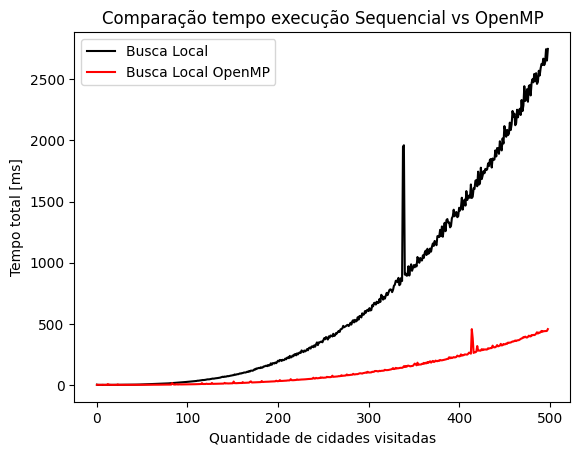

In [53]:
plot_local_search(n=500)

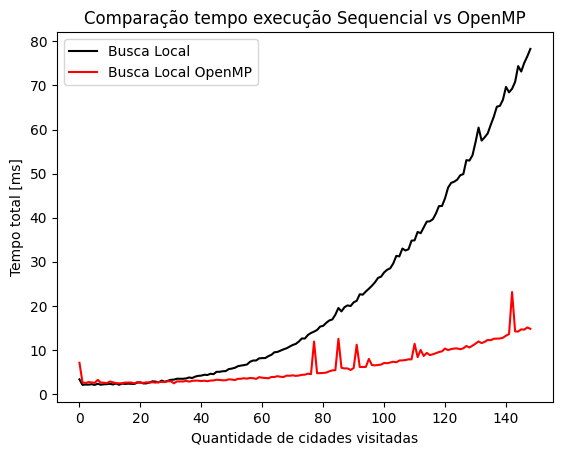

In [54]:
plot_local_search(n=150)

De posse dos resultados obtidos no gráfico acima, é possível notar que a solução sequencial e paralelizada na CPU possuem tempos similares até cerca de 50 cidades, mas a partir disso, a implementação com a paralelização fica mais eficiente.

A discussão entre utilizar a paralelização na GPU ou na CPU, depende do número de cidades. Como é possível observar no gráfico, para um n de cerca de 130 cidades, já é possível perceber que o uso da GPU é melhor, e para números menores que isso, a paralelização na GPU é mais eficiente.

Desta maneira, pode-se concluir que o método escolhido para resolver o problema até 130 cidades é a busca local paralelizada na CPU, e após isso, já vale mais a pena utilizar uma GPU.

## Se você pudesse escolher um método para resolver este problema, qual seria?

#### Acredito que a escolha de cada metódo varia de acordo com o input, e com a precisão esperada. 

#### Por exemplo: 

1. Se forem poucos dados, e a acurácia não é o principal objetivo, faz sentido método heurístico. Pois e uma solução rápida, mas não tão preciso) 


2. Se forem poucos dados, e a acurácia for o principal objetivo, eu escolheria a busca local paralelizada. Pois é um método rápido para pouco volume pequeno à médio de dados, com boa precisão


3. Caso o volume de dados fosse grande, eu escolheria a versão em GPU. Pois teóricamente, é o melhor método para grande volume de dados (pois o benefício da paralelização para grandes volumes de dados compensa o overhead de mandar, processar, e resgatar os dados da GPU).


## Fizemos implementações paralelas da busca local. Valeria a pena gastar dinheiro comprando uma CPU com mais cores ou uma GPU potente?

- Assim como o descrito anteriormente, Só valeria a pena pensar em gastar dinheiro comprando uma GPU caso a quantidade de dados fosse extremamente grande (ou em problemas que a complexidade cresce exponencialmente com o tamanho do input)

- Para um problema em com input muito grande, teóricamente, a GPU tem vantagem sobre todos os outros tipos de implementação. Mas para problemas com input de baixo à médio vale mais a pena investir em uma CPU com mais cores. Dessa forma a decisão para o investimento depende de qual será o objetivo de processamento.


## Vale a pena esperar pelo resultado da busca exaustiva?
- Somente valeria a pena esperar o resultado da busca exaustiva especificamente quando é desejável saber com 100% de precisão o caminho mais curto. 

- Porém, o tempo necessário para esse método é enorme. Dessa forma, só faz sentido esperar a execução desse método para volumes pequenos de dados. Pois em casos com maior quantidade de dados, a busca exaustiva demoraria muito mais, e o melhor caminho encontrado teria uma diferença relativamente baixa em comparação com as outras opções. 


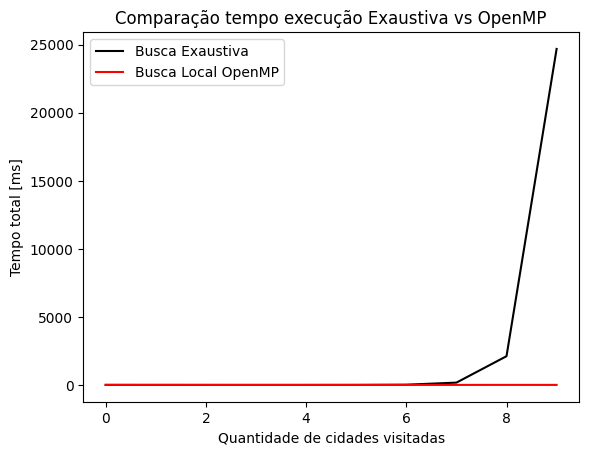

In [68]:
plot_exaustiva(11)